In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [14]:
num_workers = 0
batch_size = 20
valid_size = 0.2

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),
                                                     (0.5,0.5,0.5))])

train_data = datasets.CIFAR10('data',
                              train=True,
                              transform=transform,
                              download=True)

test_data = datasets.CIFAR10('data',
                             train=False,
                             transform=transform,
                             download=True)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(num_train * valid_size))
train_idx, valid_idx = indices[split:], indices[:split]

print(len(train_idx), len(valid_idx))

40000 10000


In [16]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           sampler=train_sampler,
                                           num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size,
                                           sampler=valid_sampler,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=num_workers)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
#Function to un-normalize and display image
def imshow(img):
    
    img = img/2 + 0.5
    plt.imshow(np.transpose(img, (1,2,0)))   #Convert from Tensor

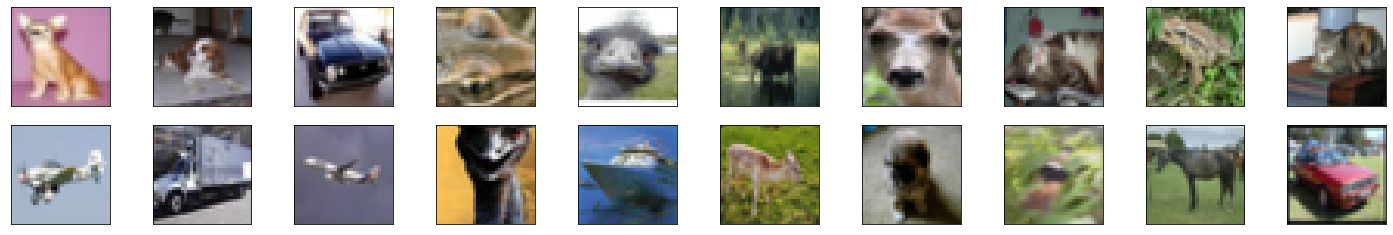

In [38]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    img = images[idx]
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(img)

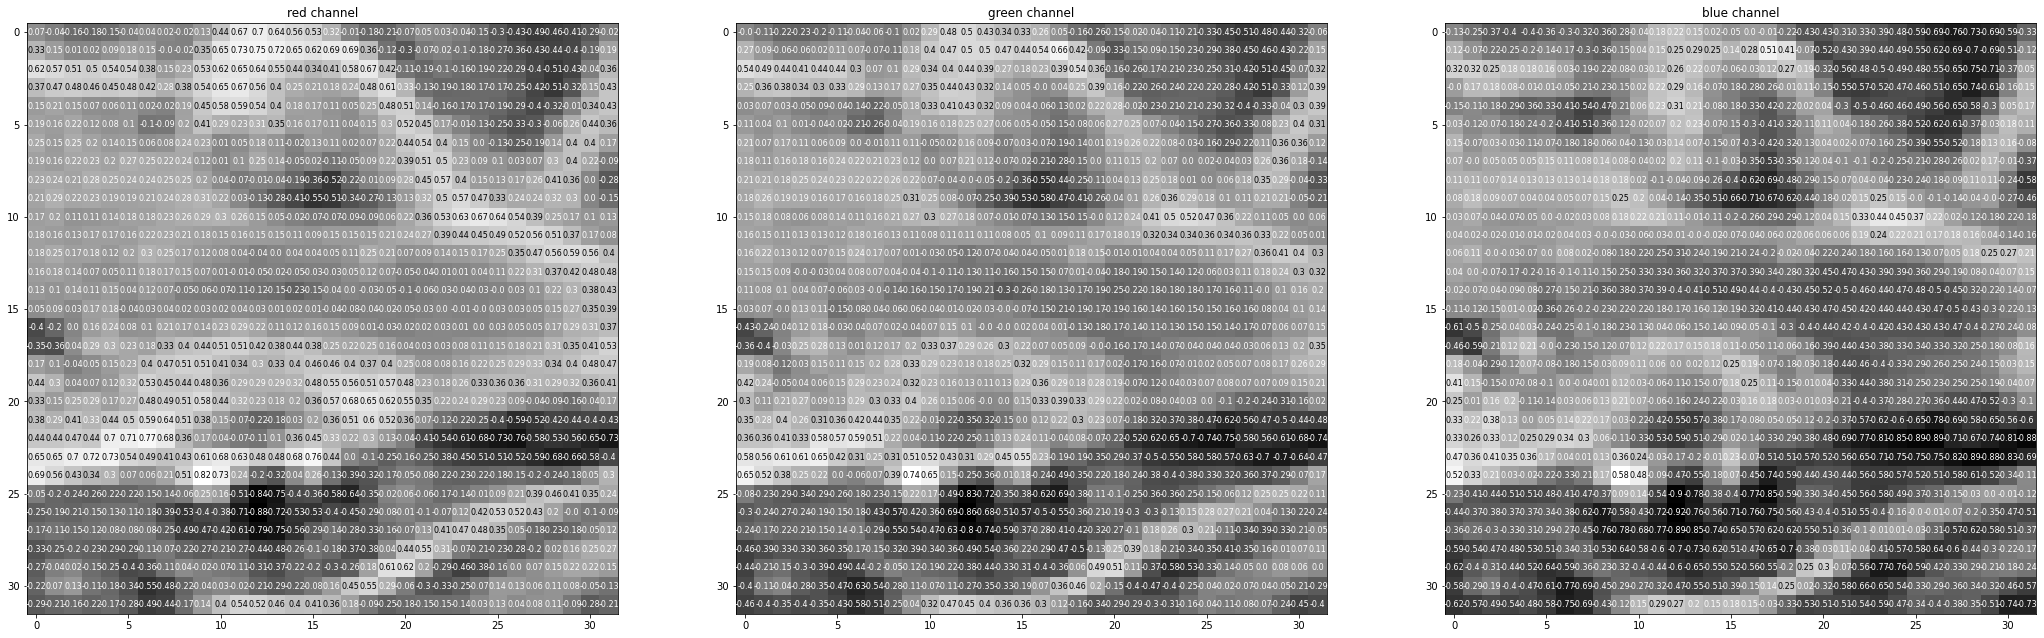

In [39]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

In [43]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
            
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
            
        self.fc1 = nn.Linear(64*4*4, 500)
        self.fc2 = nn.Linear(500, 10)
            
        self.dropout = nn.Dropout(0.25)
        self.pool = nn.MaxPool2d(2,2)
            
    def forward(x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 64*4*4)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x
    
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [44]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss()

torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
